# Simple Linear Regression

Q2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smf
import statsmodels.formula.api as sm
# import scipy.stats as stats

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA and Data Visualization

In [4]:
print('\n Describe:');   print(data.describe())
print('\n Info:');   print(data.info())
print('\n Null values:');   print(data.isnull().sum())
print('\n Duplicated:');   print(data[data.duplicated()])


 Describe:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None

 Null values:
YearsExperience    0
Salary             0
dtype: int64

 Duplicated:
Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []


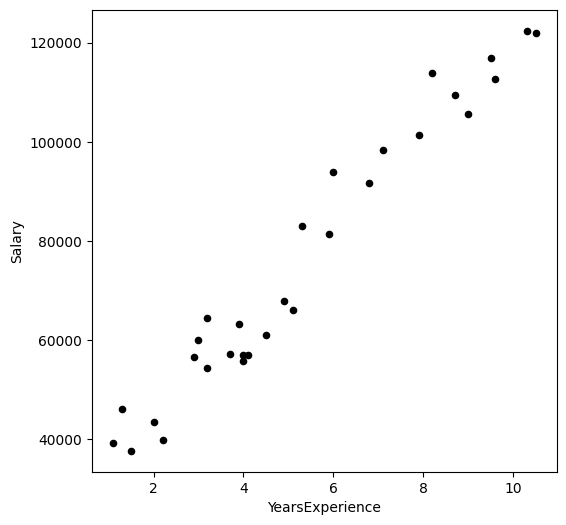

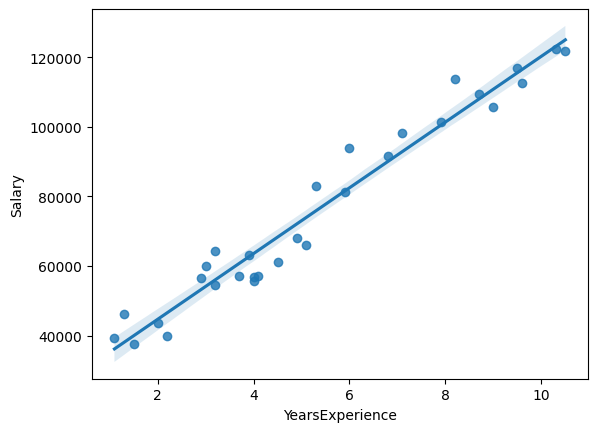

In [5]:
# Data visualizing 
data.plot(kind="scatter",
           y="Salary",
           x="YearsExperience",
           figsize=(6,6),
           color="black");
plt.show()

sns.regplot(x=data['YearsExperience'],y=data['Salary'])
plt.show()

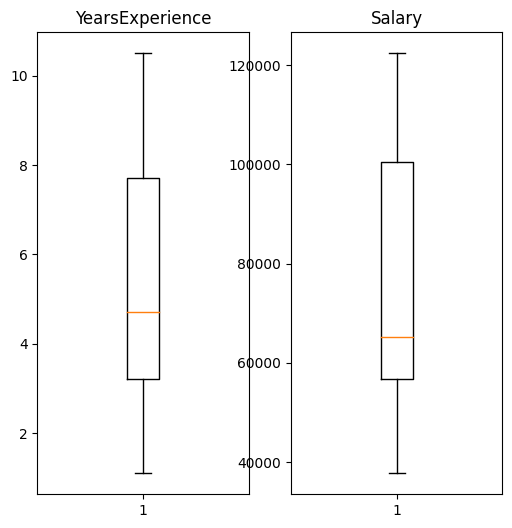

In [6]:
# display boxplots
plt.subplots(figsize = (6,6))
plt.subplot(121)   #represents the number of rows in the grid, the number of columns in the grid and the position of the subplot in the grid 
plt.boxplot(data['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(data['Salary'])
plt.title('Salary')
plt.show()

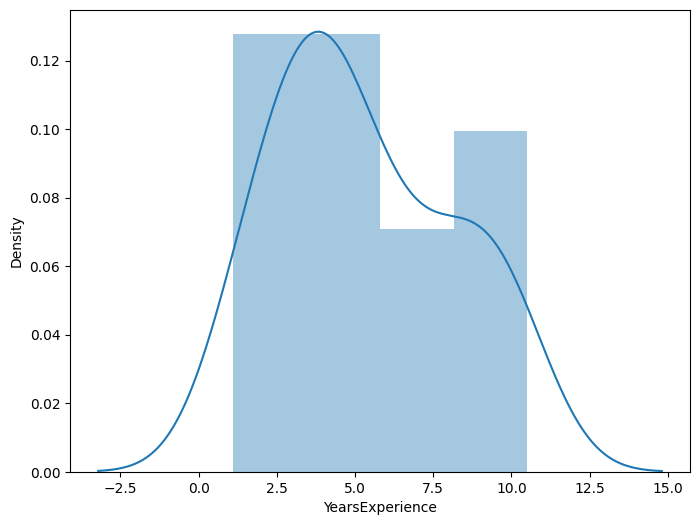

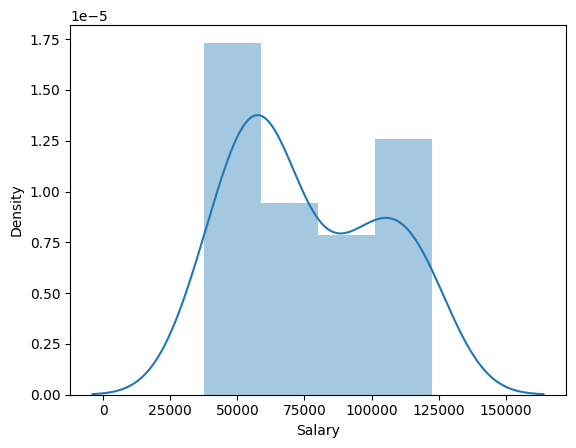

In [7]:
#  side-by-side distribution plot
plt.figure(figsize = (8,6))
# labels = ['YearsExperience', 'Salary']
sns.distplot(data['YearsExperience'], kde = True)
plt.show()
sns.distplot(data['Salary'],hist = True)
# plt.legend(labels)
plt.show()

## Correlation Analysis

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Model Building  & Testing

### Based on SK learn LR

In [9]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(data["YearsExperience"]), 
                     y = data["Salary"])

# Check trained model y-intercept
print("y-intercept:",regression_model.intercept_)

# Check trained model coefficients
print("model coefficients:",regression_model.coef_)

# Check regression_model.score
score1=regression_model.score(X = pd.DataFrame(data["YearsExperience"]), 
                       y = data["Salary"])
print("score:",score1)

y-intercept: 25792.20019866871
model coefficients: [9449.96232146]
score: 0.9569566641435086


In [10]:
# Mean Squared Error (MSE) & Root Mean Squared Error (RMSE):
predictions = regression_model.predict(X=pd.DataFrame(data["YearsExperience"]))
mse1 = mean_squared_error(data["Salary"], predictions)
rmse = np.sqrt(mse1)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 31270951.722280968
Root Mean Squared Error: 5592.043608760662


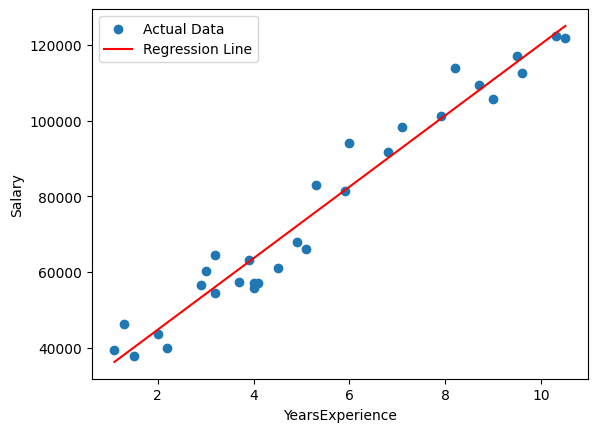

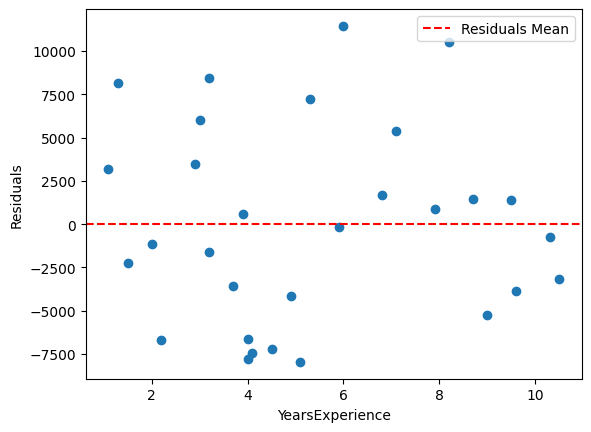

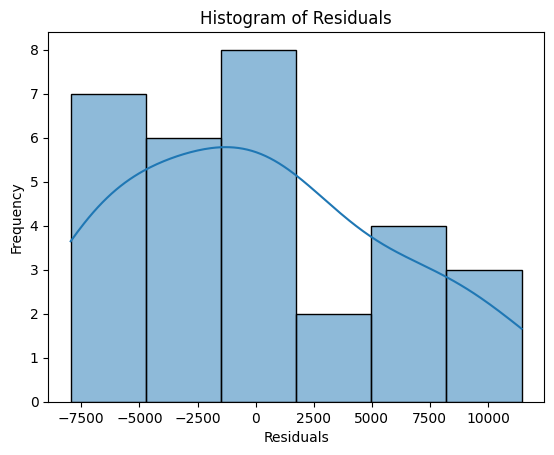

In [11]:
# Visualization
plt.scatter(data["YearsExperience"], data["Salary"], label='Actual Data')
plt.plot(data["YearsExperience"], predictions, label='Regression Line', color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Residual Analysis
residuals = data["Salary"] - predictions
plt.scatter(data["YearsExperience"], residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('YearsExperience')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


### statsmodels for linear regression

In [12]:
dataset=data.rename({'Salary':'Salary', 'YearsExperience':'YearsExperience'},axis=1)
# Fit the model
model = sm.ols(formula='Salary ~ YearsExperience', data=dataset).fit()

# Print model summary
print(model.summary())

# Check model parameters
print("Parameters:")
print(model.params)

# Predictions
predictions = model.predict(dataset['YearsExperience'])
# print("Predictions:")
# print(predictions)

# Residuals
residuals = dataset['Salary'] - predictions
# print("Residuals:")
# print(residuals)

# R-squared value
score2=model.rsquared
print("R-squared:", model.rsquared)

# Calculate Mean Squared Error
mse2 = mean_squared_error(dataset['Salary'], predictions)
print("Mean Squared Error:", mse2)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        02:06:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

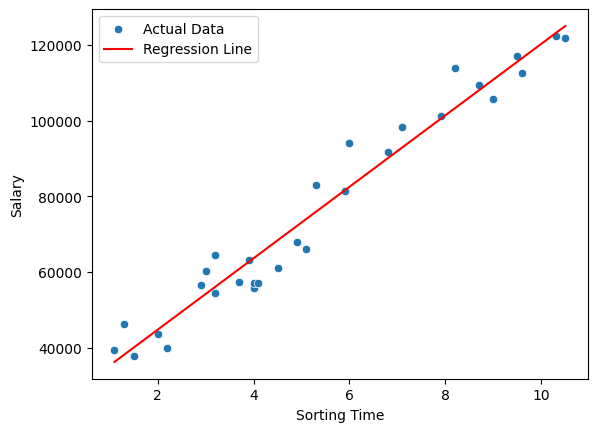

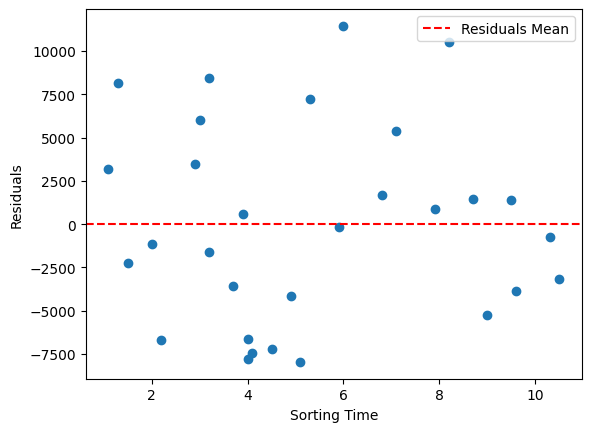

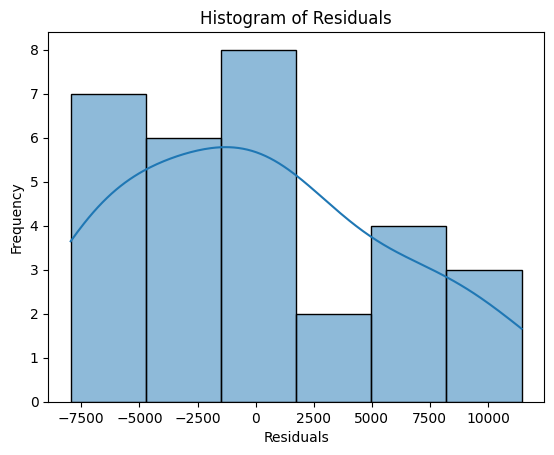

In [13]:
# Visualize the regression line along with the actual data points
sns.scatterplot(x='YearsExperience', y='Salary', data=dataset, label='Actual Data')
plt.plot(dataset['YearsExperience'], model.predict(dataset['YearsExperience']), label='Regression Line', color='red')
plt.xlabel('Sorting Time')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Residuals
residuals = model.resid

# Residual Analysis
plt.scatter(dataset['YearsExperience'], residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
plt.xlabel('Sorting Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [14]:
# Compare both method score, mse
print(score1,score2)
print(mse1,mse2)

0.9569566641435086 0.9569566641435086
31270951.722280968 31270951.72228097


### Normalizing features

In [15]:
# CustomScaler

#withoutNormalization
class withoutNormalization:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)

#Square
class SquareScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X ** 2 
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)
    
    
#Log
class LogScaler:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log(X + 1)
    def fit_transform(self, X, y=None):      
        self.fit(X, y)
        return self.transform(X)


scaler_name: without normalization
score: 0.9569566641435086
mse: 31270951.722280968

scaler_name: Standard Scaler
score: 0.9569566641435086
mse: 31270951.722280968

scaler_name: Square Transformation
score: 0.9153198857852564
mse: 61520040.46050559

scaler_name: Log Transformation
score: 0.8945639276190438
mse: 76599228.744827

 best_scaler: without normalization


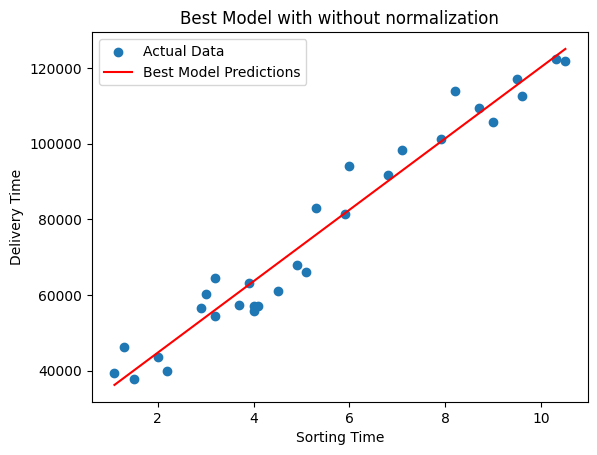

In [16]:
# Normalization to input data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X = data[['YearsExperience']]
y = data[['Salary']]
X_train = X
X_test = X
y_train= y
y_test = y 

# print('without normalization')
# print("score:",score1,"\nmse:",mse1)

results = {}

scalers = {
    'without normalization': withoutNormalization(),
    'Standard Scaler': StandardScaler(),
    # 'MinMax Scaler': MinMaxScaler(),
    # 'Robust Scaler': RobustScaler(),
    # 'Log Transformation': PowerTransformer(method='box-cox'),
    'Square Transformation': SquareScaler(),
    'Log Transformation': LogScaler(),
}

for scaler_name, scaler in scalers.items():
    print("\nscaler_name:",scaler_name)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    regression_model = LinearRegression()
    regression_model.fit(X_train_scaled, y_train)
    
    # Check regression_model.score
    score=regression_model.score(X = X_train_scaled, 
                       y = y_train)
    print("score:",score)
    
    predictions = regression_model.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, predictions)
    print("mse:",mse)

    results[scaler_name] = {'model': regression_model, 'predictions': predictions, 'mse': mse}

# Choose the best model based on mse
best_scaler = min(results, key=lambda x: results[x]['mse']); print("\n best_scaler:", best_scaler)
best_model = results[best_scaler]['model']   
best_predictions = results[best_scaler]['predictions']

# Visualize the best model's predictions
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, best_predictions, label='Best Model Predictions', color='red')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.legend()
plt.title(f'Best Model with {best_scaler}')
plt.show()


The best model is obtained using the standard scaler and without normalisation.

In [17]:
# Final output comparison
# X_scaled = LogScaler().fit_transform(X)
predictions_new = best_model.predict(X)
data['Salary_pred']=pd.DataFrame(predictions_new,columns=['Salary'])

print(data)

    YearsExperience    Salary    Salary_pred
0               1.1   39343.0   36187.158752
1               1.3   46205.0   38077.151217
2               1.5   37731.0   39967.143681
3               2.0   43525.0   44692.124842
4               2.2   39891.0   46582.117306
5               2.9   56642.0   53197.090931
6               3.0   60150.0   54142.087163
7               3.2   54445.0   56032.079627
8               3.2   64445.0   56032.079627
9               3.7   57189.0   60757.060788
10              3.9   63218.0   62647.053252
11              4.0   55794.0   63592.049484
12              4.0   56957.0   63592.049484
13              4.1   57081.0   64537.045717
14              4.5   61111.0   68317.030645
15              4.9   67938.0   72097.015574
16              5.1   66029.0   73987.008038
17              5.3   83088.0   75877.000502
18              5.9   81363.0   81546.977895
19              6.0   93940.0   82491.974127
20              6.8   91738.0   90051.943985
21        

## Model Predictions

In [18]:
# New Data
X_new = pd.Series(np.arange(1, 10, 1.5))
# X_new = X_new.values.reshape(-1, 1)
X_new=pd.DataFrame(X_new,columns=['YearsExperience'])
X_scaled = LogScaler().fit_transform(X_new)
predictions_new = best_model.predict(X_scaled)
predictions_new=pd.DataFrame(predictions_new,columns=['Salary'])

predicted = pd.concat([predictions_new, X_new], axis=1)
print(predicted)


         Salary  YearsExperience
0  32342.414938              1.0
1  37630.763049              2.5
2  41001.327830              4.0
3  43480.660244              5.5
4  45442.844417              7.0
5  47066.822870              8.5
